In [78]:
from __future__ import print_function
import numpy as np 
from keras.datasets import mnist 
from extra_keras_datasets import emnist
from keras.utils import np_utils
np.random.seed(1671)  # for reproducibility
import tensorflow
import keras

In [79]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [80]:
pip install extra-keras-datasets

Note: you may need to restart the kernel to use updated packages.


In [81]:
#from quiver_engine import server
#EMNIST 28x28 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 28
IMG_COLS = 28

In [82]:
#load dataset
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

INFO:root:Loading dataset = emnist


X_train shape: (112800, 28, 28)
112800 train samples
18800 test samples


In [83]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [84]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [85]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train.reshape(-1, 28, 28, 1)
Y_train = Y_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
Y_test = Y_test.reshape(-1, 28, 28, 1)

In [86]:
# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               3211776   
_________________________________________________________________
activation_16 (Activation)   (None, 512)             

In [87]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)             

In [88]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)             

In [89]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
705/705 [==============================] - 255s 355ms/step - loss: 1.7565 - accuracy: 0.5115 - val_loss: 0.4681 - val_accuracy: 0.8382
Epoch 2/2
705/705 [==============================] - 255s 362ms/step - loss: 0.6501 - accuracy: 0.7919 - val_loss: 0.4015 - val_accuracy: 0.8608
Testing...
147/147 [==============================] - 13s 90ms/step - loss: 0.4275 - accuracy: 0.8540

Test score: 0.4274987280368805
Test accuracy: 0.8540425300598145


In [90]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


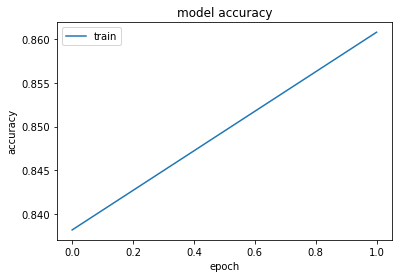

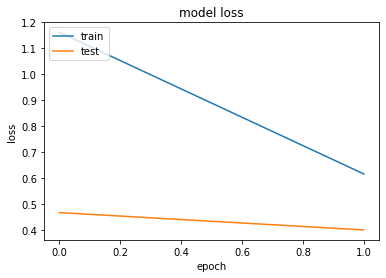

In [91]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Checking accuracy for different batch sizes**

In [92]:
#constant
BATCH_SIZE = 32
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

In [93]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
2820/2820 [==============================] - 308s 109ms/step - loss: 3.8506 - accuracy: 0.0197 - val_loss: 3.8504 - val_accuracy: 0.0205
Epoch 2/2
2820/2820 [==============================] - 305s 108ms/step - loss: 3.8505 - accuracy: 0.0207 - val_loss: 3.8503 - val_accuracy: 0.0214
Testing...
588/588 [==============================] - 15s 25ms/step - loss: 3.8502 - accuracy: 0.0213

Test score: 3.8502390384674072
Test accuracy: 0.021276595070958138


In [94]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


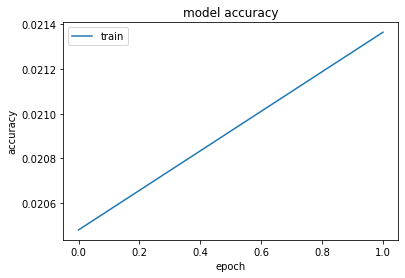

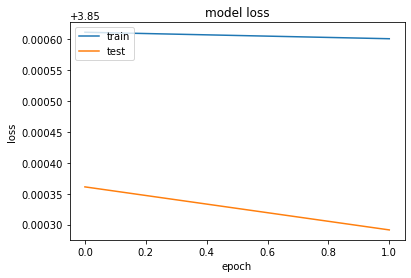

In [95]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)             

In [97]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
1410/1410 [==============================] - 261s 184ms/step - loss: 3.8506 - accuracy: 0.0206 - val_loss: 3.8502 - val_accuracy: 0.0211
Epoch 2/2
1410/1410 [==============================] - 271s 192ms/step - loss: 3.8504 - accuracy: 0.0206 - val_loss: 3.8503 - val_accuracy: 0.0205
Testing...
294/294 [==============================] - 14s 48ms/step - loss: 3.8502 - accuracy: 0.0213

Test score: 3.850186586380005
Test accuracy: 0.021276595070958138


In [98]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


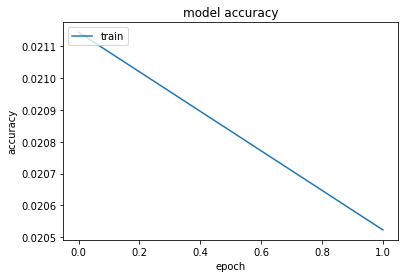

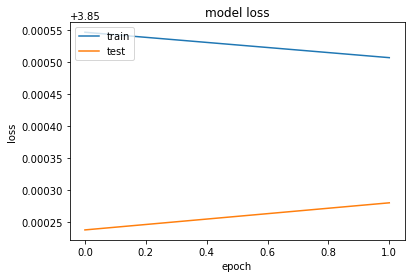

In [99]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
#constant
BATCH_SIZE = 256
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)             

In [101]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
353/353 [==============================] - 251s 707ms/step - loss: 3.8504 - accuracy: 0.0217 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 2/2
353/353 [==============================] - 252s 714ms/step - loss: 3.8503 - accuracy: 0.0216 - val_loss: 3.8502 - val_accuracy: 0.0205
Testing...
74/74 [==============================] - 13s 177ms/step - loss: 3.8502 - accuracy: 0.0213

Test score: 3.850163698196411
Test accuracy: 0.021276595070958138


In [102]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


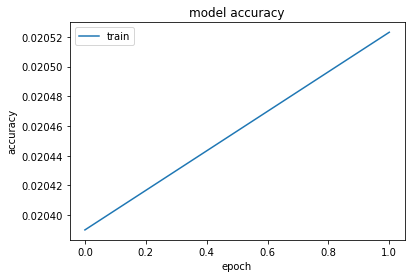

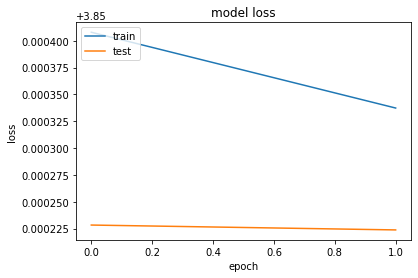

In [103]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.5**

* >**Batch size = 32  Accuracy = 2%**
* >**Batch size = 64  Accuracy = 2%**
* >**Batch size = 128 Accuracy = 85%**
* >**Batch size = 256 Accuracy = 2%**

**Checking accuracy for different epoch sizes**

In [104]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)             

In [105]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
705/705 [==============================] - 265s 375ms/step - loss: 3.8505 - accuracy: 0.0213 - val_loss: 3.8502 - val_accuracy: 0.0210
Epoch 2/10
705/705 [==============================] - 260s 368ms/step - loss: 3.8503 - accuracy: 0.0216 - val_loss: 3.8502 - val_accuracy: 0.0208
Epoch 3/10
705/705 [==============================] - 255s 361ms/step - loss: 3.8503 - accuracy: 0.0200 - val_loss: 3.8502 - val_accuracy: 0.0210
Epoch 4/10
705/705 [==============================] - 260s 369ms/step - loss: 3.8503 - accuracy: 0.0212 - val_loss: 3.8502 - val_accuracy: 0.0209
Epoch 5/10
705/705 [==============================] - 256s 364ms/step - loss: 3.8503 - accuracy: 0.0201 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 6/10
705/705 [==============================] - 257s 364ms/step - loss: 3.8503 - accuracy: 0.0201 - val_loss: 3.8503 - val_accuracy: 0.0210
Epoch 7/10
705/705 [==============================] - 257s 364ms/step - loss: 3.8503 - accuracy: 0.0210 - val_loss: 3.8503 -

In [106]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


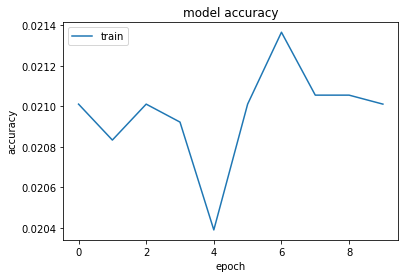

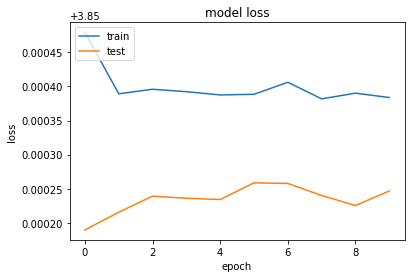

In [107]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [108]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

In [109]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
705/705 [==============================] - 259s 365ms/step - loss: 3.8505 - accuracy: 0.0199 - val_loss: 3.8503 - val_accuracy: 0.0205
Epoch 2/20
705/705 [==============================] - 260s 369ms/step - loss: 3.8503 - accuracy: 0.0202 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 3/20
705/705 [==============================] - 263s 373ms/step - loss: 3.8503 - accuracy: 0.0209 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 4/20
705/705 [==============================] - 259s 368ms/step - loss: 3.8503 - accuracy: 0.0201 - val_loss: 3.8503 - val_accuracy: 0.0210
Epoch 5/20
705/705 [==============================] - 261s 370ms/step - loss: 3.8503 - accuracy: 0.0208 - val_loss: 3.8503 - val_accuracy: 0.0205
Epoch 6/20
705/705 [==============================] - 260s 369ms/step - loss: 3.8503 - accuracy: 0.0216 - val_loss: 3.8502 - val_accuracy: 0.0210
Epoch 7/20
705/705 [==============================] - 262s 371ms/step - loss: 3.8503 - accuracy: 0.0211 - val_loss: 3.8503 -

In [110]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


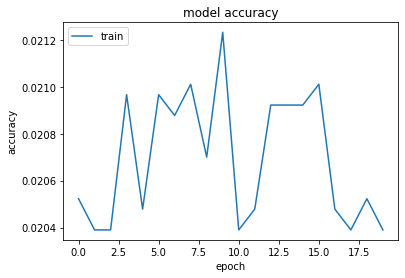

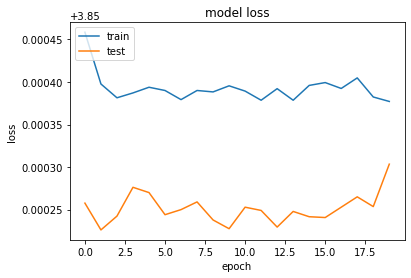

In [111]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 30
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)             

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/30
705/705 [==============================] - 258s 364ms/step - loss: 3.8504 - accuracy: 0.0207 - val_loss: 3.8502 - val_accuracy: 0.0212
Epoch 2/30
705/705 [==============================] - 259s 367ms/step - loss: 3.8503 - accuracy: 0.0200 - val_loss: 3.8502 - val_accuracy: 0.0205
Epoch 3/30
705/705 [==============================] - 256s 364ms/step - loss: 3.8503 - accuracy: 0.0211 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 4/30
705/705 [==============================] - 257s 364ms/step - loss: 3.8503 - accuracy: 0.0225 - val_loss: 3.8502 - val_accuracy: 0.0205
Epoch 5/30
705/705 [==============================] - 259s 367ms/step - loss: 3.8503 - accuracy: 0.0198 - val_loss: 3.8502 - val_accuracy: 0.0205
Epoch 6/30
705/705 [==============================] - 258s 365ms/step - loss: 3.8503 - accuracy: 0.0203 - val_loss: 3.8502 - val_accuracy: 0.0205
Epoch 7/30
705/705 [==============================] - 257s 364ms/step - loss: 3.8503 - accuracy: 0.0206 - val_loss: 3.8502 -

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* >**Epochs = 2  Test Accuracy = 54.87%**
* >**Epochs = 10 Test Accuracy = 10%**
* >**Epochs = 20 Test Accuracy = 10%** 
* >**Epochs = 30 Test Accuracy = 10%**
* >**Epochs = 40 Test Accuracy = 10%**
* >**Epochs = 50 Test Accuracy = **

**Testing accuracies for different validation splits**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.1
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.4
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* > **Validation_split = 0.1 Test Accuracy =**
* > **Validation_split = 0.2 Test Accuracy =**
* > **Validation_split = 0.3 Test Accuracy =**
* > **Validation_split = 0.4 Test Accuracy =**

**Checking accuracies of different OPTIMs**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 Dropout=0.25,0.5**

* >**RMSprop()**
* >**Adam()**
* >**SGD()**

**Checking accuracies for different Dropout values**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.6))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.7))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.9))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.9))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = Adam() Dropout=0.25,0.5**

* >**Dropout=0.1 Accuracy=**
* >**Dropout=0.2 Accuracy=**
* >**Dropout=0.3 Accuracy=**
* >**Dropout=0.4 Accuracy=**
* >**Dropout=0.5 Accuracy=**
* >**Dropout=0.6 Accuracy=**
* >**Dropout=0.7 Accuracy=**
* >**Dropout=0.8 Accuracy=**
* >**Dropout=0.9 Accuracy=**

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 47
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=47, activation='softmax'))
model.summary()

In [ ]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

In [ ]:
#server.launch(model)
#save model
model_json = model.to_json()
open('EMNIST_architecture.json', 'w').write(model_json)
model.save_weights('EMNIST_weights.h5', overwrite=True)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()